In [1]:
!pip install datacleaner

  Preparing metadata (setup.py) ... done
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7408 sha256=a088bf1712f688b74ba256cbfb844beaa3335e00d583e9430c01df79c0008ffa
  Stored in directory: /root/.cache/pip/wheels/8f/bc/5b/f7ca5772f61851334a8580f3ede175b92a7122eef3464e2b3d
Successfully built datacleaner


In [2]:
!pip install fasteda

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=800e6a1bb0c152d1b4cac2254c20f17be17e454af4041cab5bccccc8a06edd81
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [3]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas_profiling as pf

import datacleaner
from datacleaner import autoclean
from fasteda import fast_eda
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [4]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1  0.230    Ideal     E     SI2 61.500 55.000    326 3.950 3.980   
1           2  0.210  Premium     E     SI1 59.800 61.000    326 3.890 3.840   
2           3  0.230     Good     E     VS1 56.900 65.000    327 4.050 4.070   
3           4  0.290  Premium     I     VS2 62.400 58.000    334 4.200 4.230   
4           5  0.310     Good     J     SI2 63.300 58.000    335 4.340 4.350   

      z  
0 2.430  
1 2.310  
2 2.310  
3 2.630  
4 2.750

## Data Inspection

In [5]:
df.shape

(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

Unnamed: 0     carat     depth     table     price         x         y  \
count   53940.000 53940.000 53940.000 53940.000 53940.000 53940.000 53940.000   
mean    26970.500     0.798    61.749    57.457  3932.800     5.731     5.735   
std     15571.281     0.474     1.433     2.234  3989.440     1.122     1.142   
min         1.000     0.200    43.000    43.000   326.000     0.000     0.000   
25%     13485.750     0.400    61.000    56.000   950.000     4.710     4.720   
50%     26970.500     0.700    61.800    57.000  2401.000     5.700     5.710   
75%     40455.250     1.040    62.500    59.000  5324.250     6.540     6.540   
max     53940.000     5.010    79.000    95.000 18823.000    10.740    58.900   

              z  
count 53940.000  
mean      3.539  
std       0.706  
min       0.000  
25%       2.910  
50%       3.530  
75%       4.040  
max      31.800

## Data Profiling

In [8]:
df.profile_report(title='Diamonds Prices Data')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning and Preprocessing

In [9]:
df.drop(["Unnamed: 0"], inplace = True, axis = 1)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0  0.230    Ideal     E     SI2 61.500 55.000    326 3.950 3.980 2.430
1  0.210  Premium     E     SI1 59.800 61.000    326 3.890 3.840 2.310
2  0.230     Good     E     VS1 56.900 65.000    327 4.050 4.070 2.310
3  0.290  Premium     I     VS2 62.400 58.000    334 4.200 4.230 2.630
4  0.310     Good     J     SI2 63.300 58.000    335 4.340 4.350 2.750

In [10]:
df = df.rename(columns = {
    "carat": "x_0", 
    "cut": "x_1", 
    "color": "x_2", 
    "clarity": "x_3", 
    "depth": "x_4", 
    "table": "x_5", 
    "price": "f(x)", 
    "x": "x_6", 
    "y": "x_7", 
    "z": "x_8"
})
df.head()

x_0      x_1 x_2  x_3    x_4    x_5  f(x)   x_6   x_7   x_8
0 0.230    Ideal   E  SI2 61.500 55.000   326 3.950 3.980 2.430
1 0.210  Premium   E  SI1 59.800 61.000   326 3.890 3.840 2.310
2 0.230     Good   E  VS1 56.900 65.000   327 4.050 4.070 2.310
3 0.290  Premium   I  VS2 62.400 58.000   334 4.200 4.230 2.630
4 0.310     Good   J  SI2 63.300 58.000   335 4.340 4.350 2.750

In [11]:
df_clean = autoclean(df)
df_clean.head()

x_0  x_1  x_2  x_3    x_4    x_5  f(x)   x_6   x_7   x_8
0 0.230    2    1    3 61.500 55.000   326 3.950 3.980 2.430
1 0.210    3    1    2 59.800 61.000   326 3.890 3.840 2.310
2 0.230    1    1    4 56.900 65.000   327 4.050 4.070 2.310
3 0.290    3    5    5 62.400 58.000   334 4.200 4.230 2.630
4 0.310    1    6    3 63.300 58.000   335 4.340 4.350 2.750

## Duplicates

In [12]:
df_clean.duplicated().sum()

146

In [13]:
df_clean = df_clean.drop_duplicates()

## Outliers

In [14]:
for col in df_clean:
  q1 = df_clean[col].quantile(0.25)
  q3 = df_clean[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  df_clean[col] = np.where(df_clean[col] > upper_whisker, upper_whisker, np.where(df_clean[col] < lower_whisker, lower_whisker, df_clean[col]))

## EDA

DataFrame Head:


x_0   x_1   x_2   x_3    x_4    x_5    f(x)   x_6   x_7   x_8
0 0.230 2.000 1.000 3.000 61.500 55.000 326.000 3.950 3.980 2.430
1 0.210 3.000 1.000 2.000 59.800 61.000 326.000 3.890 3.840 2.310
2 0.230 1.000 1.000 4.000 58.750 63.500 327.000 4.050 4.070 2.310

DataFrame Tail:


x_0   x_1   x_2   x_3    x_4    x_5     f(x)   x_6   x_7   x_8
53937 0.700 4.000 0.000 2.000 62.800 60.000 2757.000 5.660 5.680 3.560
53938 0.860 3.000 4.000 3.000 61.000 58.000 2757.000 6.150 6.120 3.740
53939 0.750 2.000 0.000 3.000 62.200 55.000 2757.000 5.830 5.870 3.640

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(53794, 10)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     53794 non-null  float64
 1   x_1     53794 non-null  float64
 2   x_2     53794 non-null  float64
 3   x_3     53794 non-null  float64
 4   x_4     53794 non-null  float64
 5   x_5     53794 non-null  float64
 6   f(x)    53794 non-null  float64
 7   x_6     53794 non-null  float64
 8   x_7     53794 non-null  float64
 9   x_8     53794 non-null  float64
dtypes: float64(10)
memory usage: 4.5 MB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



----------------------------------------------------------------------------------------------------
DataFrame Correlation:



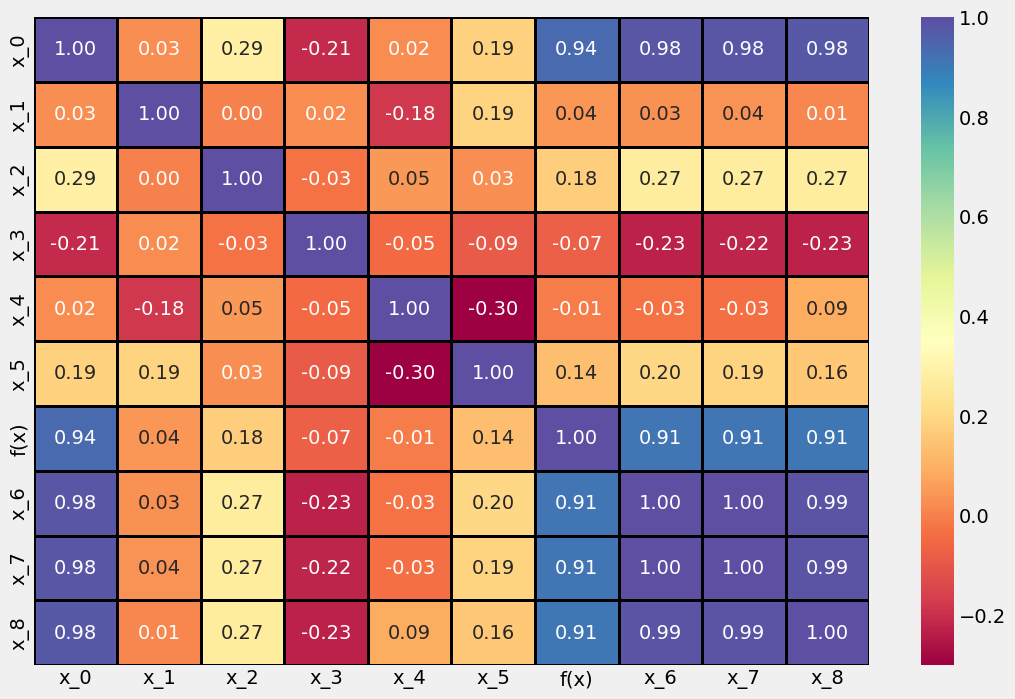

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



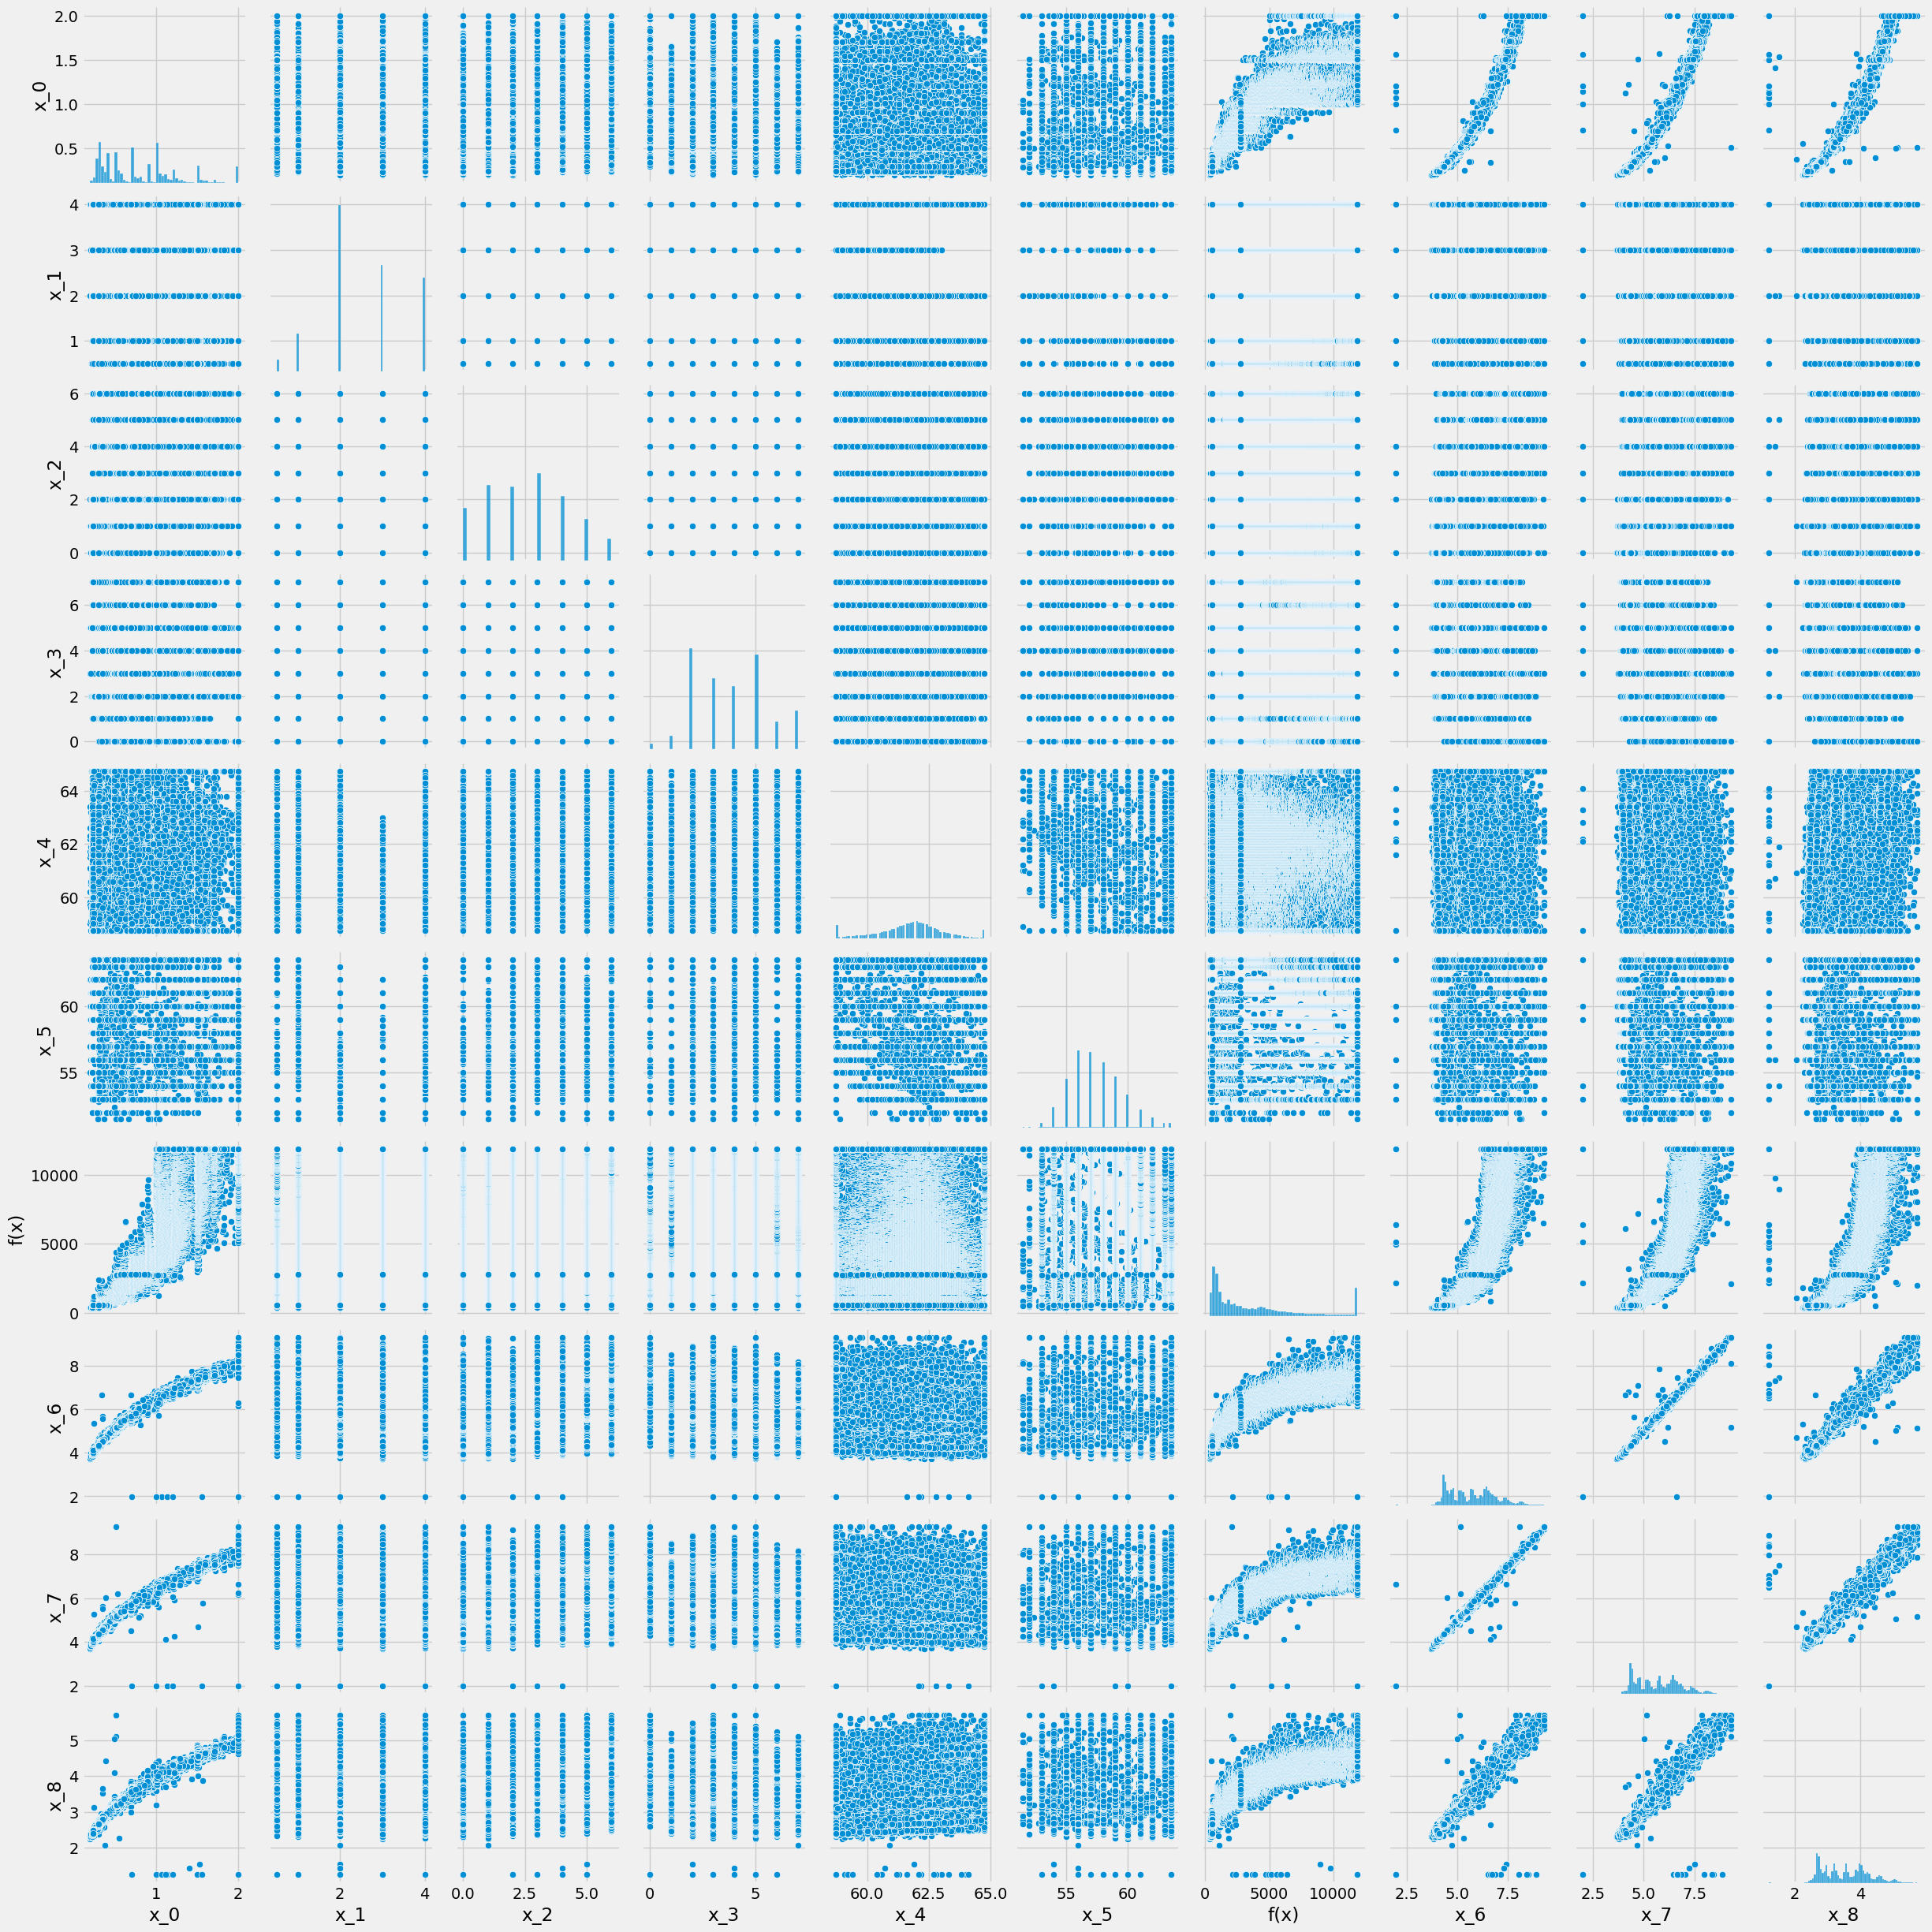

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



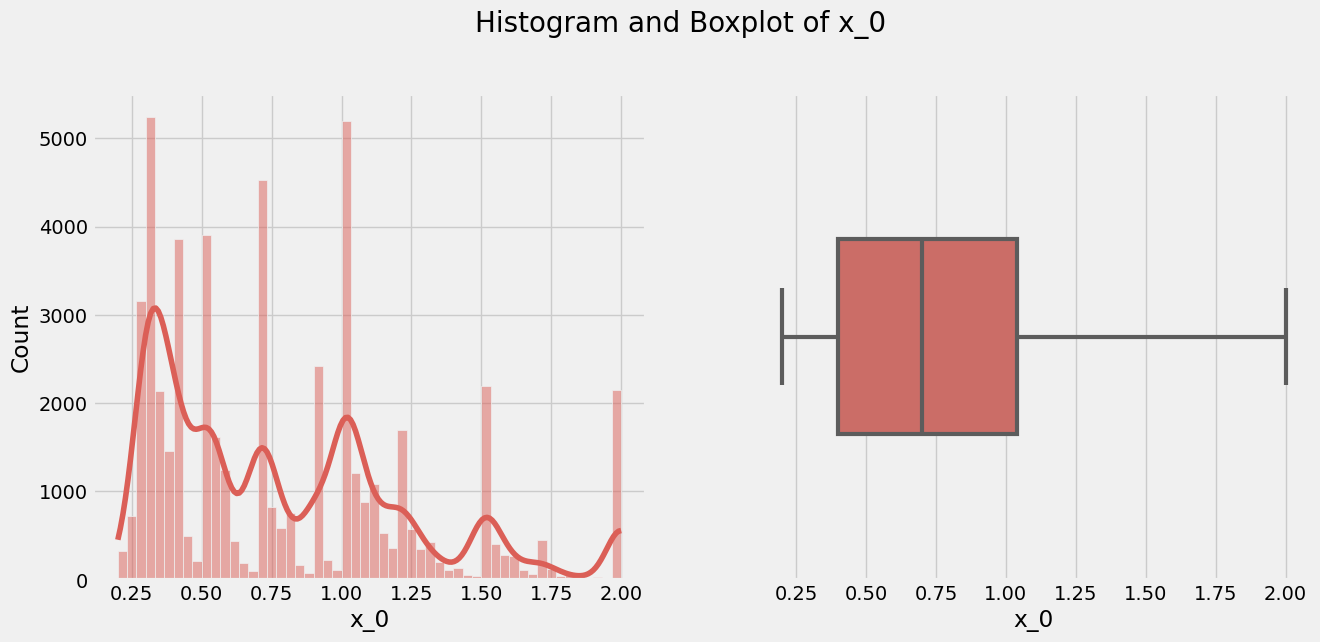

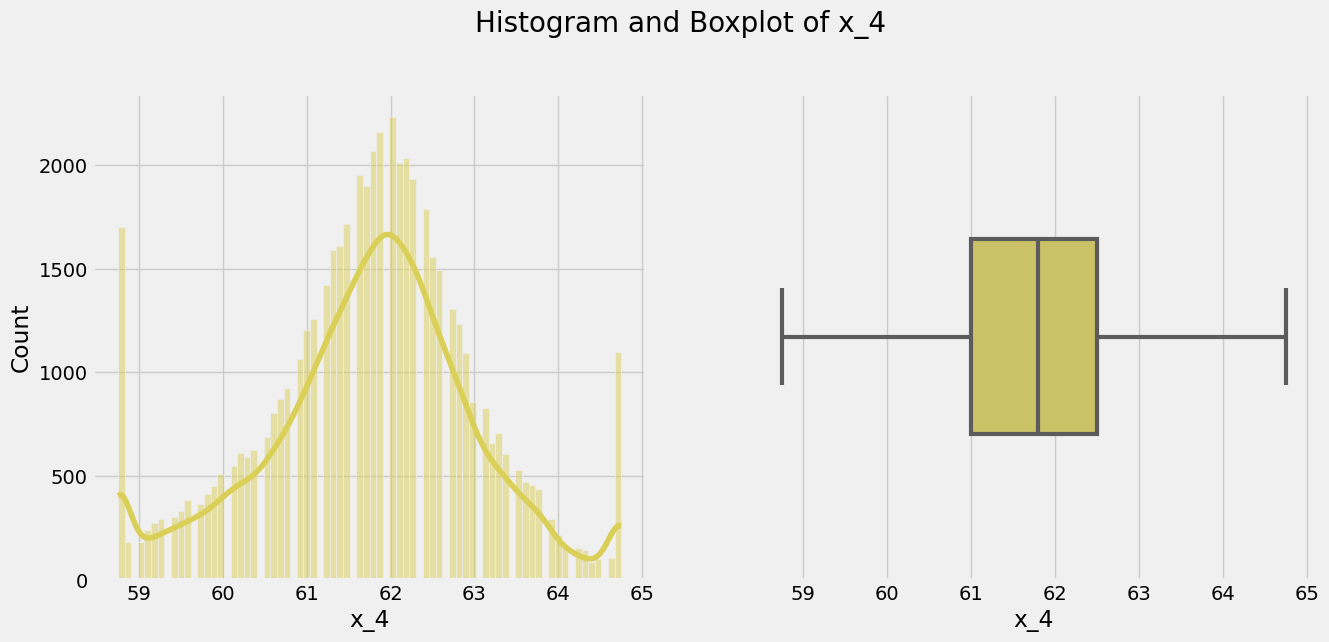

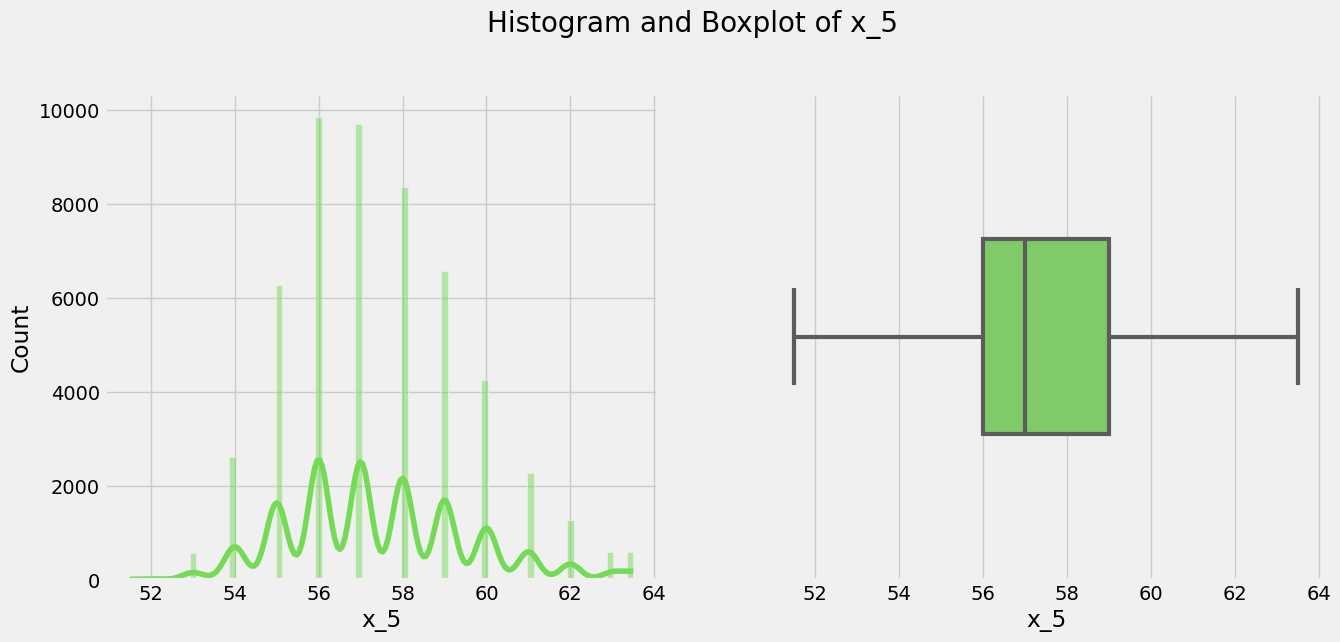

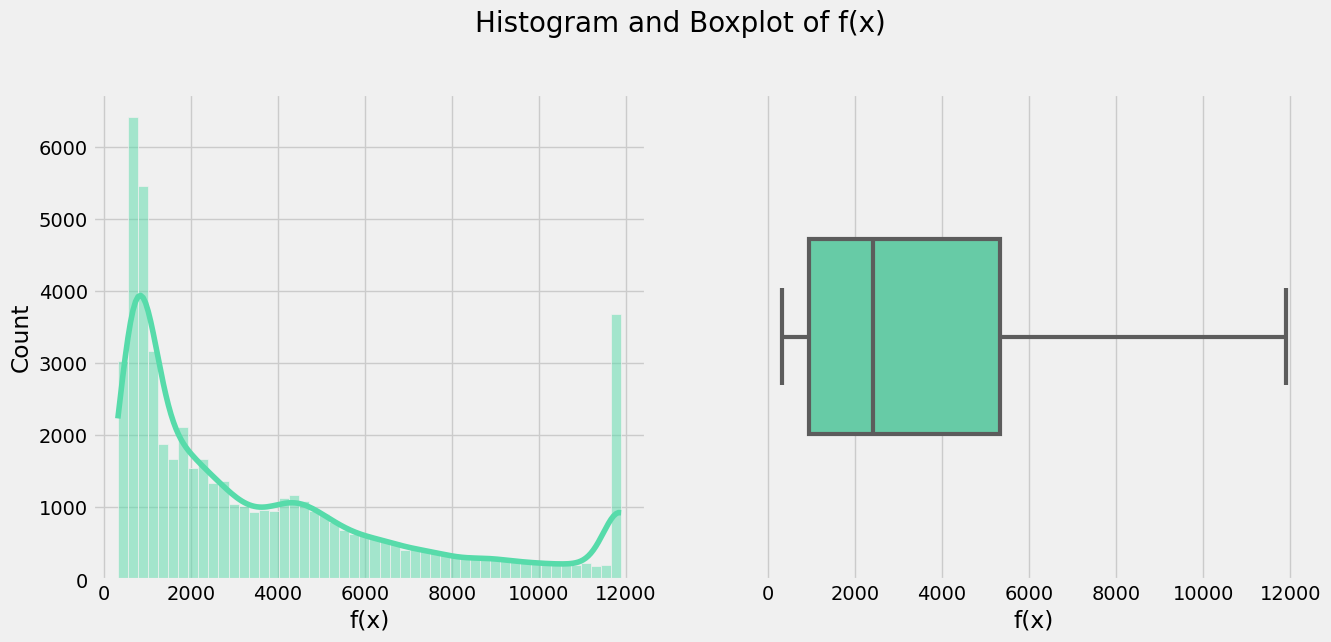

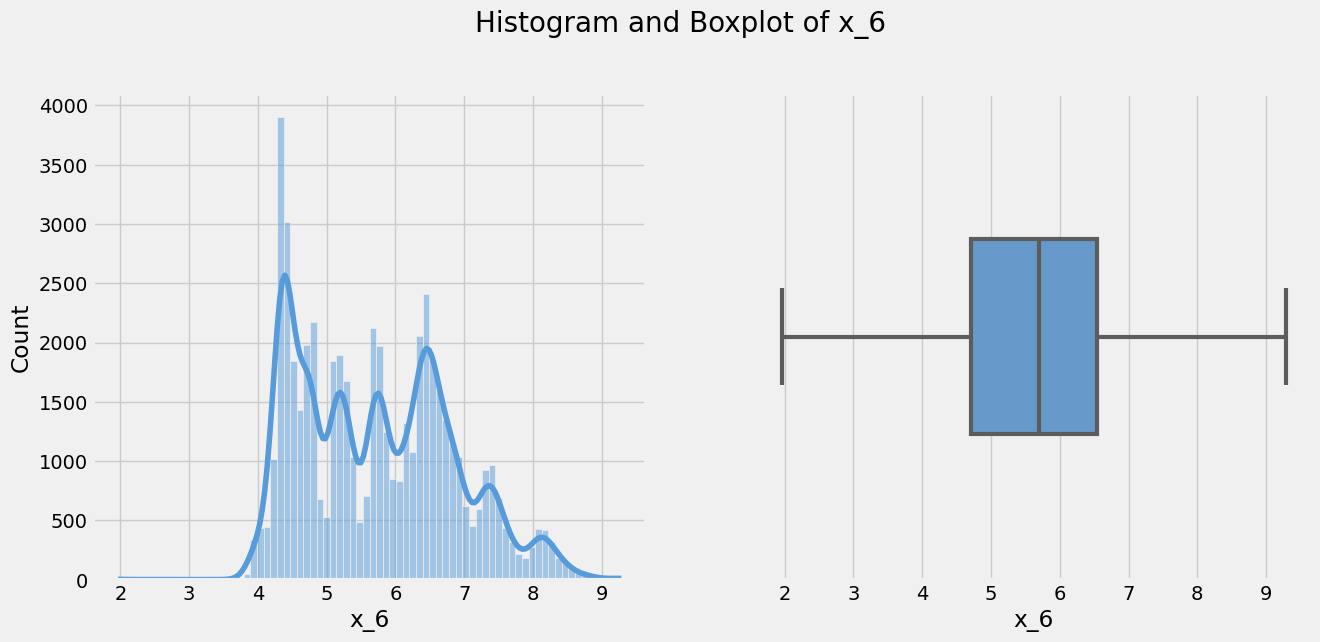

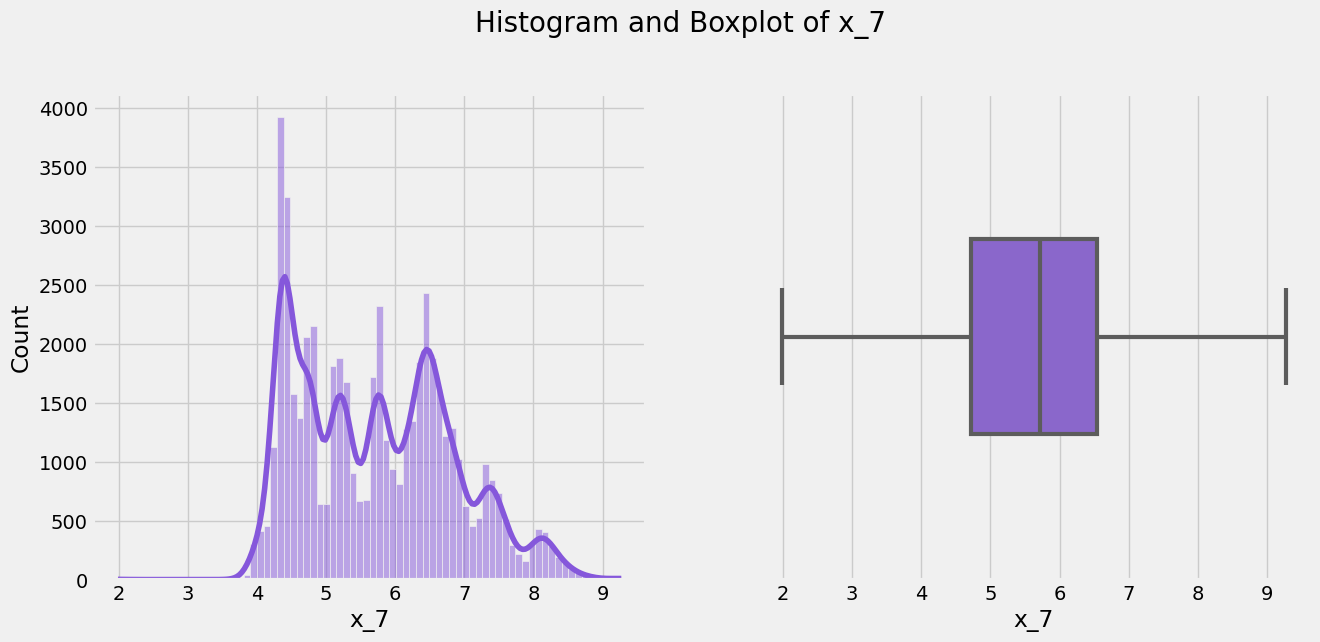

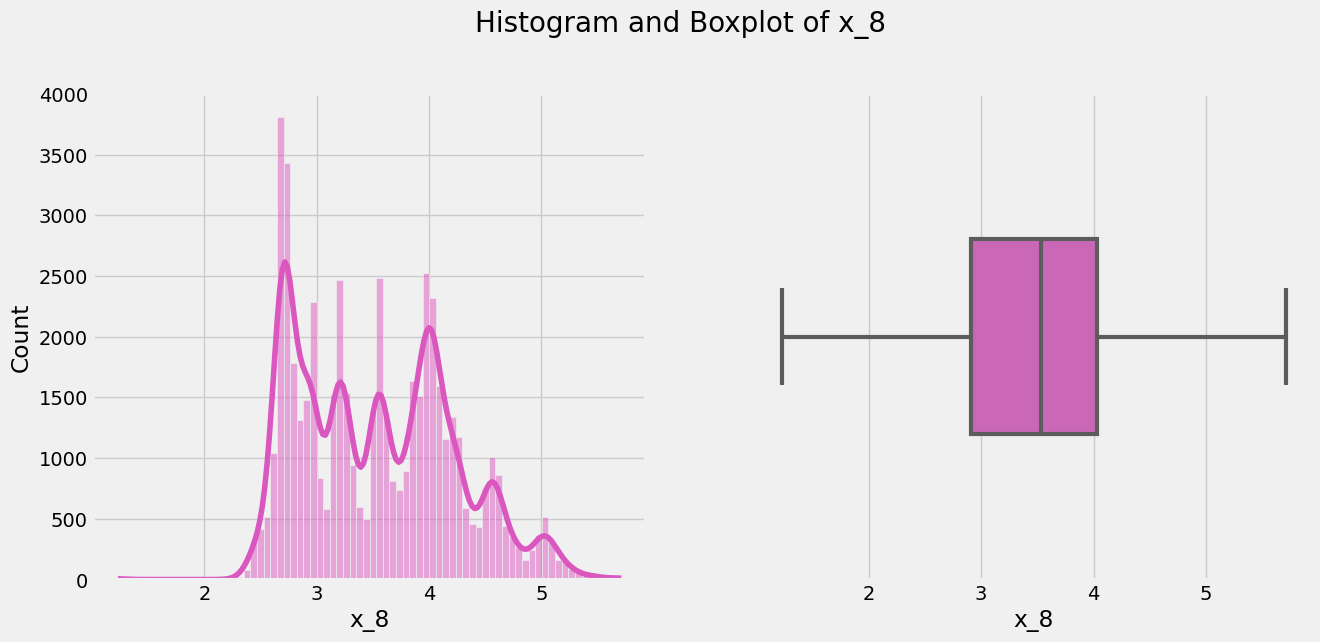

----------------------------------------------------------------------------------------------------
Countplot(s):



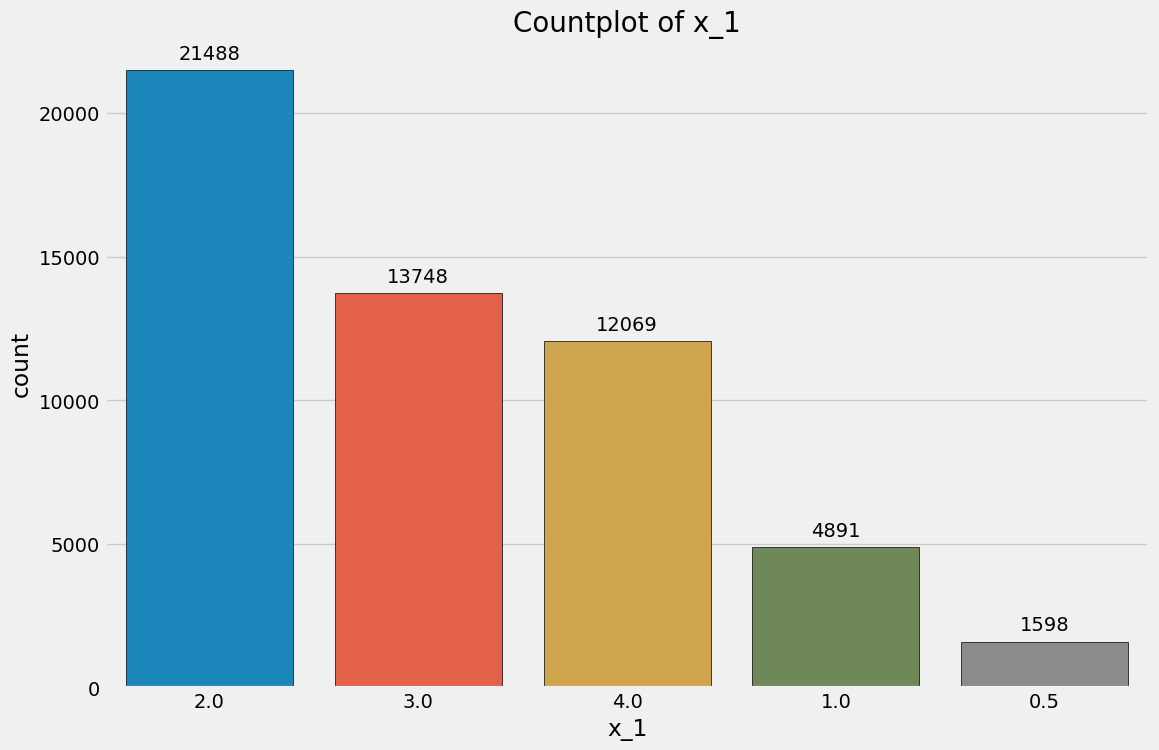

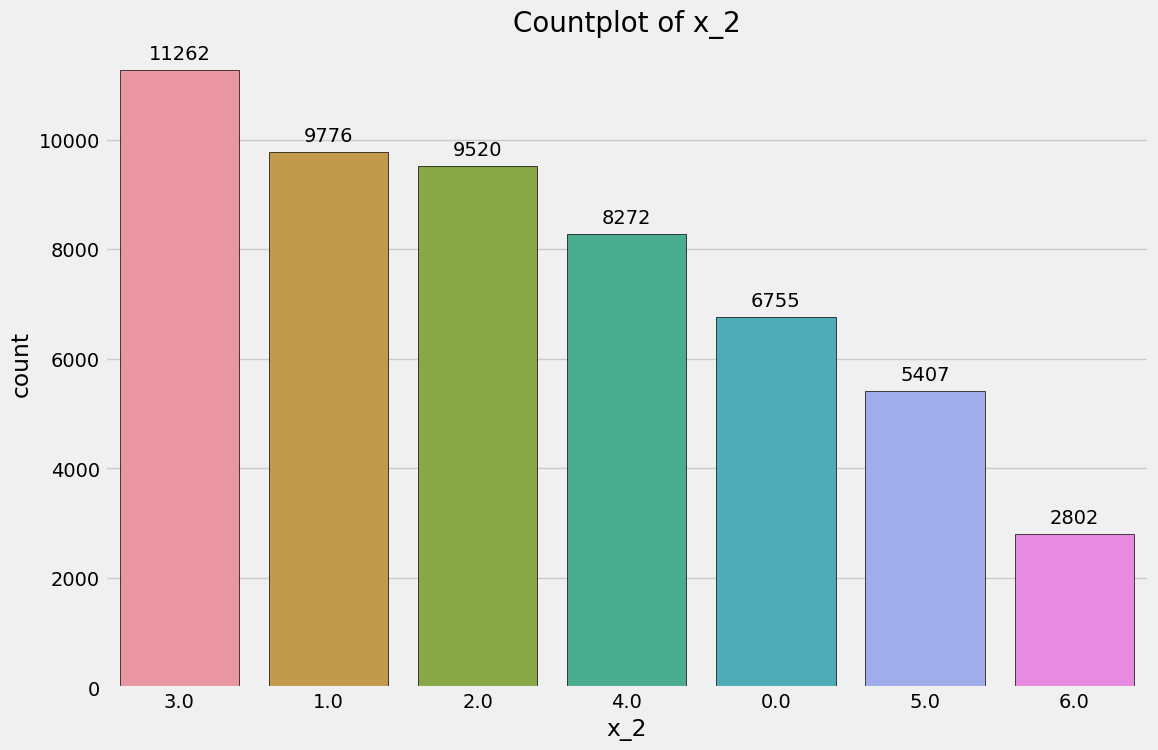

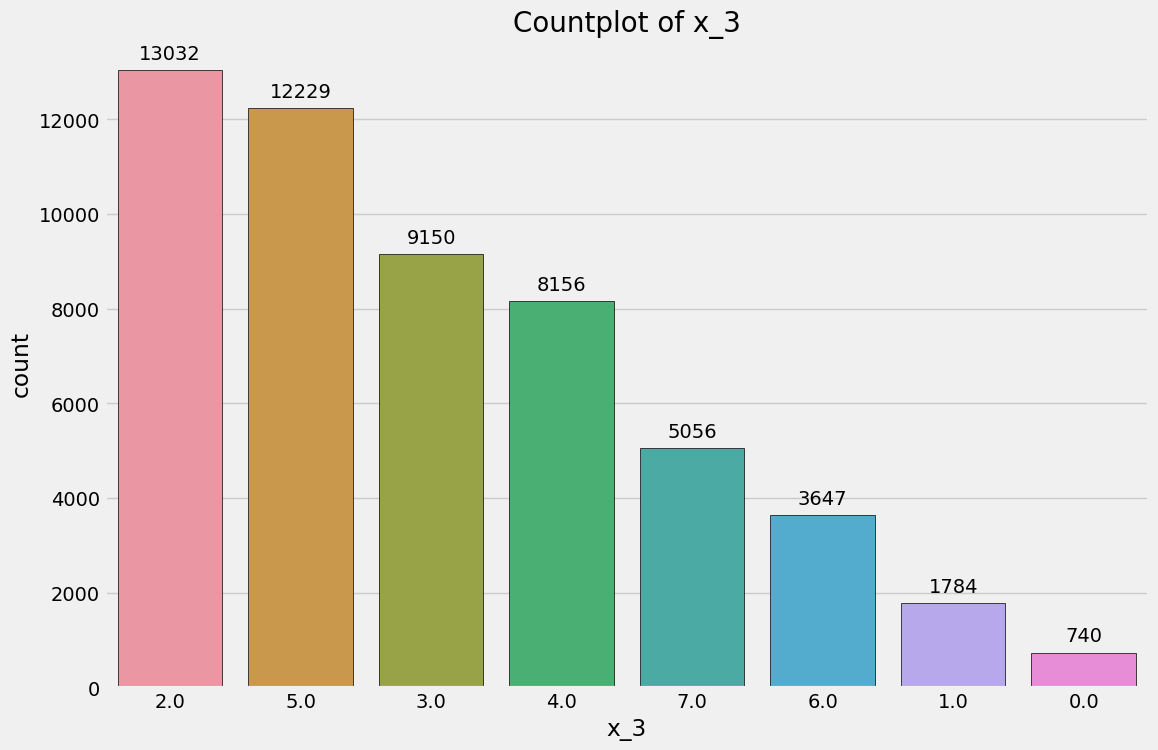

In [15]:
fast_eda(df_clean)